In [ ]:
from google.colab.patches import cv2_imshow
import cv2, os, json, random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [ ]:
image=mpimg.imread('/content/download.jpeg')

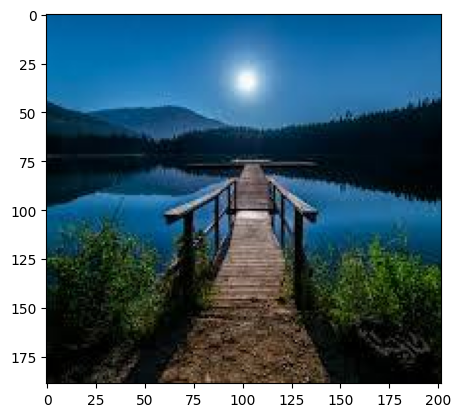

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(189, 202, 3)

array([[[  1,  95, 157],
        [  1,  95, 157],
        [  0,  94, 156],
        ...,
        [  1,  94, 153],
        [  1,  94, 153],
        [  1,  94, 153]],

       [[  1,  95, 157],
        [  1,  95, 157],
        [  1,  95, 157],
        ...,
        [  1,  94, 153],
        [  1,  94, 153],
        [  1,  94, 153]],

       [[  2,  96, 158],
        [  2,  96, 158],
        [  1,  95, 157],
        ...,
        [  1,  96, 154],
        [  1,  96, 154],
        [  1,  96, 154]],

       ...,

       [[  6,   6,   4],
        [  9,   9,   7],
        [ 11,  11,   9],
        ...,
        [  3,   3,   1],
        [ 12,  13,   8],
        [ 11,  12,   7]],

       [[ 12,  12,  10],
        [ 15,  15,  13],
        [ 16,  16,  14],
        ...,
        [  2,   2,   0],
        [  9,  10,   5],
        [  8,   9,   4]],

       [[ 16,  16,  14],
        [ 19,  19,  17],
        [ 19,  19,  17],
        ...,
        [  2,   2,   0],
        [  6,   7,   2],
        [  7,   8,   3]]], dtype=uint8)
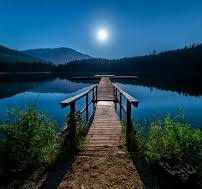

In [ ]:
image[:]

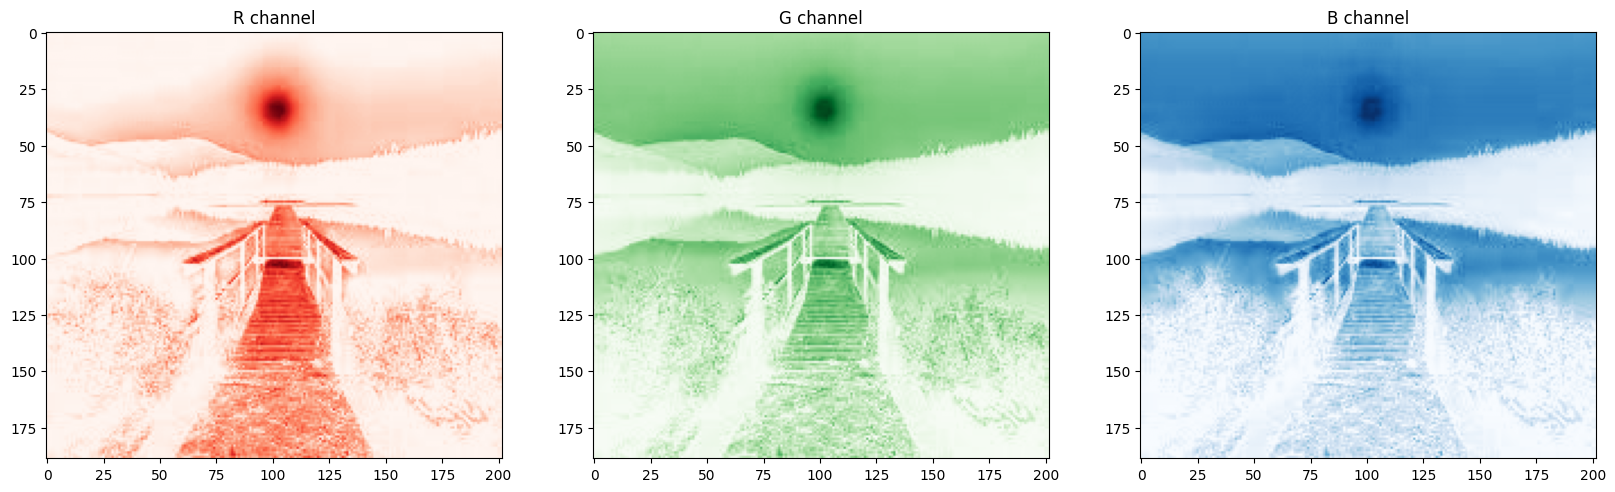

In [ ]:
r=image[:,:,0]
g = image[:,:,1]
b=image[:,:,2]
#Visualize the individual color channels
f, (ax1, ax2, ax3)= plt.subplots (1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='Reds')
ax2.set_title('G channel')
ax2.imshow(g, cmap='Greens')
ax3.set_title('B channel')
ax3.imshow(b, cmap='Blues')

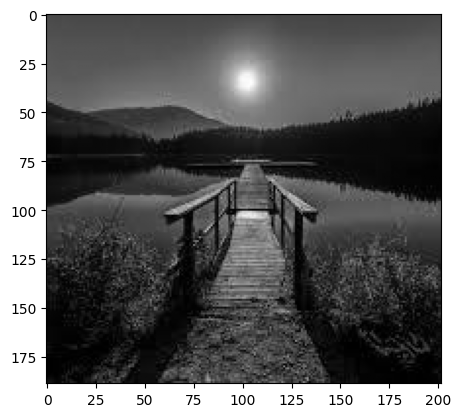

In [ ]:
# Convert to grayscale for filtering

gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

MNIST is one of the most famous datasets in the field of machine learning.



It has 70,000 images of hand-written digits

Very straight forward to download


Images dimensions are 28x28

Grayscale images

In [ ]:
from tensorflow.keras.datasets import mnist
#use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

**Visualize the First six training images**

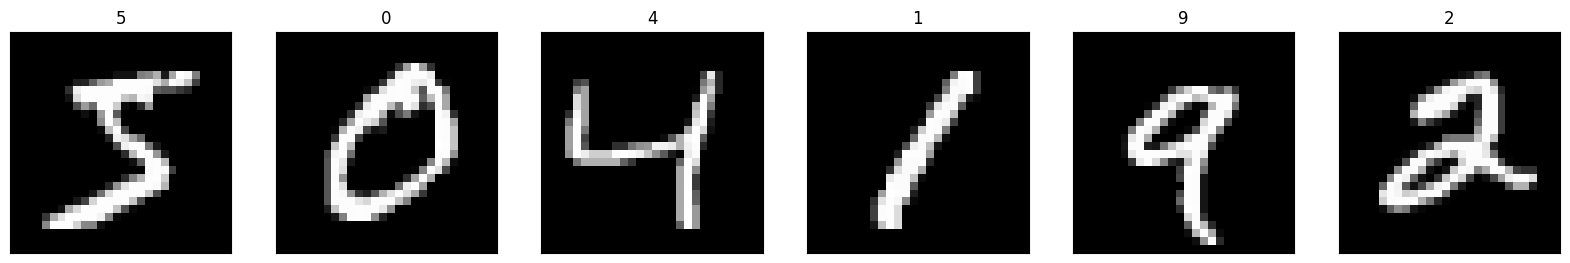

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

#plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax= fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

In [ ]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
X_train[0].max()

np.float32(1.0)

In [ ]:
X_train[0].min()

np.float32(0.0)

In [ ]:
y_train.shape

(60000,)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train.ndim

1

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes = 10 # or len(np.unique(y_train))
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [ ]:
# Reload original data to correct the shape
from tensorflow.keras.datasets import mnist
(_, y_train), (_, y_test) = mnist.load_data()

print("Shape of y_train after correction:", y_train.shape)
print("Shape of y_test after correction:", y_test.shape)

Shape of y_train after correction: (60000, 10)
Shape of y_test after correction: (10000, 10)


In [ ]:
img_rows,img_cols = 28,28

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train[0].ndim

3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
model = Sequential()

model.add(Conv2D(30,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1))) #conv layer we are using 30 conv layers & relu(bcz wts can be -ve or +ve)
model.add(MaxPooling2D(pool_size=(4,4))) #max pooling layer

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())

model.add(Dense(128,activation='relu')) #fully converted to get relevant data

model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))
# model.add(Dense(10,activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 30)     │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,254 (106.46 KB)

 Trainable params: 27,254 (106.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='model.weights.best.keras',monitor='val_loss',mode='min',save_best_only=True,verbose=1)
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
hist = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test),callbacks=[checkpoint],verbose=2,shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.17967, saving model to model.weights.best.keras
938/938 - 9s - 10ms/step - accuracy: 0.8020 - loss: 0.6209 - val_accuracy: 0.9433 - val_loss: 0.1797
Epoch 2/10

Epoch 2: val_loss improved from 0.17967 to 0.10433, saving model to model.weights.best.keras
938/938 - 3s - 3ms/step - accuracy: 0.9433 - loss: 0.1881 - val_accuracy: 0.9669 - val_loss: 0.1043
Epoch 3/10

Epoch 3: val_loss improved from 0.10433 to 0.09050, saving model to model.weights.best.keras
938/938 - 5s - 6ms/step - accuracy: 0.9591 - loss: 0.1375 - val_accuracy: 0.9727 - val_loss: 0.0905
Epoch 4/10

Epoch 4: val_loss improved from 0.09050 to 0.08772, saving model to model.weights.best.keras
938/938 - 3s - 4ms/step - accuracy: 0.9647 - loss: 0.1161 - val_accuracy: 0.9737 - val_loss: 0.0877
Epoch 5/10

Epoch 5: val_loss improved from 0.08772 to 0.07632, saving model to model.weights.best.keras
938/938 - 5s - 5ms/step - accuracy: 0.9698 - loss: 0.1005 - val_accuracy: 0.97

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.06510049104690552
Test accuracy: 0.9811999797821045


In [ ]:
model2 = Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(4,4)))

model2.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model2.add(MaxPooling2D(pool_size=(4,4)))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))

model2.add(Dropout(0.5))

model2.add(Dense(num_classes,activation='softmax'))
# model.add(Dense(10,activation='softmax'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,426 (111.04 KB)

 Trainable params: 28,426 (111.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='model2.weights.best.keras',monitor='val_loss',mode='min',save_best_only=True,verbose=1)
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
hist = model2.fit(X_train,y_train,batch_size=64,epochs=7,validation_data=(X_test,y_test),callbacks=[checkpoint],verbose=2,shuffle=True)

Epoch 1/7

Epoch 1: val_loss improved from inf to 0.13641, saving model to model2.weights.best.keras
938/938 - 8s - 8ms/step - accuracy: 0.8110 - loss: 0.5928 - val_accuracy: 0.9589 - val_loss: 0.1364
Epoch 2/7

Epoch 2: val_loss improved from 0.13641 to 0.10645, saving model to model2.weights.best.keras
938/938 - 3s - 3ms/step - accuracy: 0.9442 - loss: 0.1830 - val_accuracy: 0.9668 - val_loss: 0.1065
Epoch 3/7

Epoch 3: val_loss improved from 0.10645 to 0.06760, saving model to model2.weights.best.keras
938/938 - 3s - 3ms/step - accuracy: 0.9622 - loss: 0.1289 - val_accuracy: 0.9781 - val_loss: 0.0676
Epoch 4/7

Epoch 4: val_loss improved from 0.06760 to 0.05628, saving model to model2.weights.best.keras
938/938 - 5s - 5ms/step - accuracy: 0.9704 - loss: 0.1006 - val_accuracy: 0.9821 - val_loss: 0.0563
Epoch 5/7

Epoch 5: val_loss did not improve from 0.05628
938/938 - 4s - 4ms/step - accuracy: 0.9744 - loss: 0.0860 - val_accuracy: 0.9767 - val_loss: 0.0753
Epoch 6/7

Epoch 6: val_lo

In [ ]:
loss, accuracy = model2.evaluate(X_test,y_test,verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.04902112856507301
Test accuracy: 0.9843000173568726


In [ ]:
model3 = Sequential()

model3.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())

model3.add(Dense(128,activation='relu'))

model3.add(Dropout(0.5))

model3.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 30)     │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,510 (212.93 KB)

 Trainable params: 27,254 (106.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,256 (106.47 KB)

In [ ]:
model3.compile(loss='categorical_crossentropy',optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='model3.weights.best.keras',monitor='val_loss',mode='min',save_best_only=True,verbose=1)
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
hist = model3.fit(X_train,y_train,batch_size=64,epochs=7,validation_data=(X_test,y_test),callbacks=[checkpoint],verbose=2,shuffle=True)

Epoch 1/7

Epoch 1: val_loss improved from inf to 0.04583, saving model to model3.weights.best.keras
938/938 - 8s - 8ms/step - accuracy: 0.9368 - loss: 0.2069 - val_accuracy: 0.9844 - val_loss: 0.0458
Epoch 2/7

Epoch 2: val_loss improved from 0.04583 to 0.03635, saving model to model3.weights.best.keras
938/938 - 3s - 4ms/step - accuracy: 0.9786 - loss: 0.0714 - val_accuracy: 0.9885 - val_loss: 0.0363
Epoch 3/7

Epoch 3: val_loss improved from 0.03635 to 0.03171, saving model to model3.weights.best.keras
938/938 - 3s - 4ms/step - accuracy: 0.9838 - loss: 0.0519 - val_accuracy: 0.9892 - val_loss: 0.0317
Epoch 4/7

Epoch 4: val_loss improved from 0.03171 to 0.02860, saving model to model3.weights.best.keras
938/938 - 5s - 5ms/step - accuracy: 0.9876 - loss: 0.0427 - val_accuracy: 0.9908 - val_loss: 0.0286
Epoch 5/7

Epoch 5: val_loss improved from 0.02860 to 0.02759, saving model to model3.weights.best.keras
938/938 - 3s - 4ms/step - accuracy: 0.9890 - loss: 0.0391 - val_accuracy: 0.990

In [ ]:
loss, accuracy = model3.evaluate(X_test,y_test,verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.025052446871995926
Test accuracy: 0.9925000071525574
